In [1]:
#그래프 그리는 데 필요한 것들
from matplotlib import pyplot as plt #for plot
import numpy as np
import pandas as pd

#데이터분석하고 연산하는 데 필요한 것들
from scipy.optimize import curve_fit, leastsq  #→ 최적화 피팅
#from tqdm import tqdm 
from scipy.stats import gaussian_kde 
import scipy as sc 
import math as math 

#그래프 폰트 크기 공통으로 설정
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 10
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


[52.52543193539678, 48.50933930698294, 37.4729902729953, 31.458338163355037, 31.233816449483086, 37.220008060181826, 49.42639982843177, 34.46882649583534, 10.704309879669964, 2.630698785494075, 1.9103319345077179, 7.314348227969462, 2.7584548029648777, 3.6366193091936365, 3.367825708079324, 3.984469851812158]


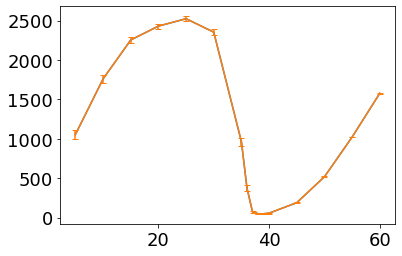

<Figure size 4000x2000 with 0 Axes>

In [2]:
##### 2D XY Plot


x = [5,10,15,20,25,   30,35,36,37,38,   39,40,45,50,55,   60]
y = [1054, 1760, 2254, 2430, 2524,   2353, 961.5, 374.6, 72.43, 48.22,    47.52, 55.11, 188.4, 517.3, 1021,   1577]
std = [1661, 1534, 1185, 994.8, 987.7,    1177, 1563, 1090, 338.5, 83.19,    60.41, 231.3, 87.23, 115, 106.5,  126]
Number_of_event = 1000
Number_of_bin = 16
Stat_error = [] 

for i in range(Number_of_bin):
    Stat_error.append(std[i]/pow(1000,0.5)) 

print(Stat_error)

plt.plot(x,y)
plt.errorbar(x,y,yerr=Stat_error,capsize=3)
plt.figure(figsize=(50, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.show() 

In [3]:
##### 1D Histogram

filename = 'GeneratedData.txt'

def plotHist(filename, bin_num = 50):
    dataframe = pd.read_csv(filename)
    data = np.array(dataframe)
    
    counts, bins = np.histogram(data, bins = bin_num)
    
    plt.figure(figsize = (10,5))
    plt.hist(data, bins = bin_num)
    plt.title("Generated Cherenkov Photons")
    plt.xlabel("Wavelengths")
    plt.ylabel("# of Cherenkov Photons")
    plt.show()
    
    print(counts, bins)


plotHist(filename)


FileNotFoundError: [Errno 2] No such file or directory: 'GeneratedData.txt'

counts_2 [  0   0   1   0   0   0   1   1   0  15 346 670 706 610 571 542 358 226
 166 140  84  59  36  31  29  19  28  20   6  11   8   4   7   2] 34
[  0   1  -1   1   0   1  -1  -1   0  -5  70  60 109 111 102  86  38  39
  36   0  14  11  12   7   3   7 -11  -5  13   1   4  -3  -2  -1]
counts_3 [  0   1   0   1   0   1   0   0   0   0  70  60 109 111 102  86  38  39
  36   0  14  11  12   7   3   7   0   0  13   1   4   0   0   0] 34
bins_1_list [400, 409, 418, 427, 436, 445, 454, 463, 472, 481, 490, 499, 508, 517, 526, 535, 544, 553, 562, 571, 580, 589, 598, 607, 616, 625, 634, 643, 652, 661, 670, 679, 688, 697] 34


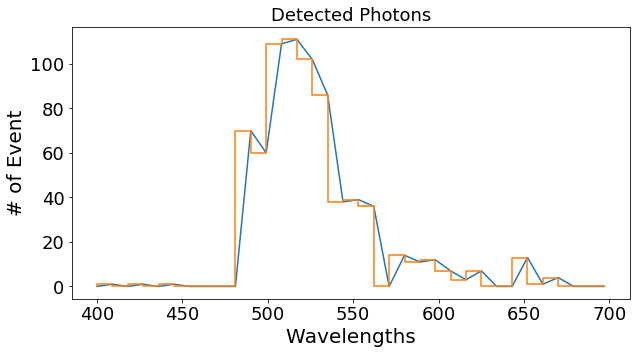

In [59]:
##### 1D Histogram

filename1 = 'noKill_1GeV_HitData_Chrenkov.txt'
filename2 = 'Kill_1GeV_HitData_Chrenkov.txt'
filename3 = 'noKill_1GeV_HitData_Scintillation.txt'
filename4 = 'Kill_1GeV_HitData_Scintillation.txt'

bin_num = range(400,709,9) 

def plotHist(filename_1, filename_2, bin_num = 50):
    dataframe_1 = pd.read_csv(filename_1)
    data_1 = np.array(dataframe_1)
    counts_1, bins_1 = np.histogram(data_1, bins = bin_num)
    #print(bins_1)
    
    dataframe_2 = pd.read_csv(filename_2)
    data_2 = np.array(dataframe_2)
    counts_2, bins_2 = np.histogram(data_2, bins = bin_num)
    #print(bins_2)
    print('counts_2',counts_2, len(counts_2))
    
    counts_3 = np.array(counts_1-counts_2)
    
    ##np.where(counts_3<0, 0, counts_3)
    
    print(counts_3)
    for i in range(len(counts_3)):
        if counts_3[i]<0:
            counts_3[i]=0
    print('counts_3',counts_3, len(counts_3))
    
    
    plt.figure(figsize = (10,5))
    #plt.hist(data_1, bins = bin_num)
    #plt.hist(data_2, bins = bin_num)
    
    
    
    counts_3_list = counts_3.tolist()
    bins_1_list = bins_1.tolist()
    bins_1_list.pop(len(bins_1_list)-1)
    print('bins_1_list',bins_1_list, len(bins_1_list))
    plt.plot(bins_1_list,counts_3_list)
    plt.step(bins_1_list,counts_3_list)
    
    plt.title("Detected Photons")
    plt.xlabel("Wavelengths")
    plt.ylabel("# of Event")
    #plt.show()
    
    #list = []
    #for i in range(len(counts_3)):
    #    for counts_3[i]:
            
    
    #plt.hist(counts_3, bins = 99)
    


plotHist(filename1, filename2, bin_num)
#plotHist(filename3, filename4, bin_num)